In [94]:
import numpy as np
np.random.seed(42)
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sb
from sklearn.model_selection import train_test_split

In [95]:
dataset = make_blobs(n_samples=100, n_features=2, centers=1)
x = dataset[0]
y = dataset[1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [96]:
def dataset_stats(x: np.ndarray) -> None:
    print(f"samples: {x.shape[0]}")
    print(f"features: {x.shape[1]}")
    print(f"min: {np.min(x, axis=0)}, max: {np.max(x, axis=0)}")
    mean, std = np.mean(x, axis=0), np.std(x, axis=0)
    print(f"mean: {mean}, std: {std}")

In [97]:
dataset_stats(x_train)

samples: 67
features: 2
min: [-5.12894273  7.02671721], max: [-0.64342311 11.20474175]
mean: [-2.62221169  9.01622524], std: [0.8294177  0.93972814]


In [98]:
def plot_dist(x: np.ndarray) -> None:
    sb.jointplot(x=x[:, 0], y=x[:, 1])
    plt.show()

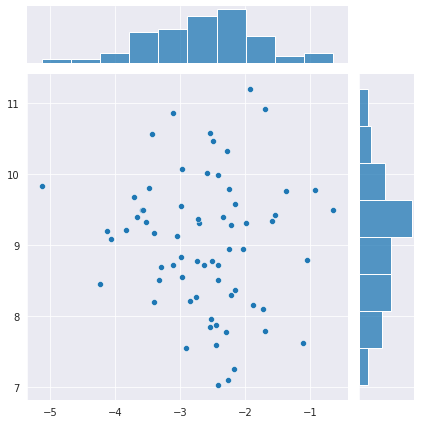

In [99]:
plot_dist(x_train)

#### MinMax Scaler

In [100]:
class MinMaxScaler:
    def __init__(self):
        self.data_min: np.ndarray = None
        self.data_max: np.ndarray = None

    def fit(self, x: np.ndarray):
        self.data_min = np.min(x, axis=0)
        self.data_max = np.max(x, axis=0)

    def transform(self, x: np.ndarray) -> np.ndarray:
        x_transformed = (x-self.data_min) / (self.data_max-self.data_min)
        return x_transformed

samples: 67
features: 2
min: [0. 0.], max: [1. 1.]
mean: [0.55884964 0.4761839 ], std: [0.18491006 0.22492164]


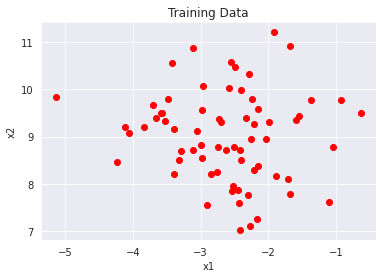

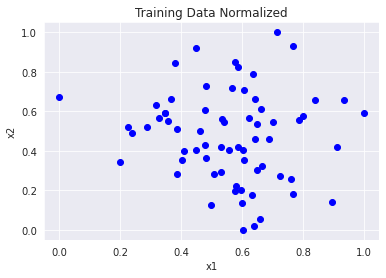

In [101]:
scaler = MinMaxScaler()

scaler.fit(x_train)
x_transformed = scaler.transform(x_train)

dataset_stats(x_transformed)

plt.title("Training Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(x=x_train[:,0], y=x_train[:,1], color="red")
plt.show()
plt.title("Training Data Normalized")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(x_transformed[:,0], y=x_transformed[:,1], color="blue")
plt.show()

#### Standard Scaler

In [102]:
class StandardScaler:
    def __init__(self):
        self.mean_: np.ndarray = None
        self.std_: np.ndarray = None

    def fit(self, x: np.ndarray):
        self.mean_ = np.mean(x, axis=0)
        self.std_ = np.std(x, axis=0)

    def transform(self, x: np.ndarray) -> np.ndarray:
        x_transformed = (x-self.mean_) / self.std_
        return x_transformed

In [103]:
scaler = StandardScaler()
scaler.fit(x_train)
x_transformed = scaler.transform(x_train)

dataset_stats(x_transformed)

samples: 67
features: 2
min: [-3.0222782 -2.1171102], max: [2.38575639 2.32888261]
mean: [-1.11022302e-16 -8.28524645e-18], std: [1. 1.]


In [104]:
arr = np.array([[1, 2], [3, 7], [2, 8], [4, 10], [3, 4], [2, 6], [1, 4]])

mean = np.mean(arr, axis=0)
std = np.std(arr, axis=0)
print((arr-mean)/std)

[[-1.24807544 -1.52369815]
 [ 0.69337525  0.45146612]
 [-0.2773501   0.84649897]
 [ 1.66410059  1.63656468]
 [ 0.69337525 -0.73363244]
 [-0.2773501   0.05643326]
 [-1.24807544 -0.73363244]]
